In [2]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn import svm

print('Libraries imported.')

Libraries imported.


In [3]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 13.3 MB/s 
time: 471 µs (started: 2022-11-26 11:16:02 +00:00)


In [5]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive
time: 16.1 s (started: 2022-11-26 11:16:14 +00:00)


In [ ]:
filename = '/content/drive/MyDrive/ColabNotebooks/MachineLearning/HomeWork1_Dataset.tsv'
df = pd.read_csv(filename, sep='\t', header=0)
print('File loaded: %d samples.' %(len(df)))
print("Number of columns: ", len(df.columns))

In [6]:
X_all = df.iloc[:,:35]df['num_collisions']
classification_y_all = 
regression_y_all = df['min_CPA']


#apply normalization
X_normalized = X_all.copy()
for column in X_normalized.columns:
  X_normalized[column] = (X_normalized[column] - X_normalized[column].min()) / (X_normalized[column].max() - X_normalized[column].min())    


reg_y_all_normalized = regression_y_all.copy()
reg_y_all_normalized = (reg_y_all_normalized - reg_y_all_normalized.min()) / (reg_y_all_normalized.max() - reg_y_all_normalized.min())    


time: 50.4 ms (started: 2022-11-25 18:12:37 +00:00)


In [7]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_normalized,classification_y_all,train_size=0.66,random_state=200)

print("Dataset x train :", x_train.shape)
print("Dataset y train :", y_train.shape)
print("Dataset x test :", x_test.shape)
print("Dataset y test :", y_test.shape)

Dataset x train : (660, 35)
Dataset y train : (660,)
Dataset x test : (340, 35)
Dataset y test : (340,)
time: 19.1 ms (started: 2022-11-25 18:12:37 +00:00)


#ENSEMBLE GRADIENT BOOST

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.0001, max_depth=1, random_state=0).fit(x_train, y_train)

time: 1.35 s (started: 2022-11-23 19:03:23 +00:00)


In [23]:
#print("Best classification hyper-parameters for GradientBoostingClassifier: %r" %clf.best_params_)
print("Best accuracy: %.4f" %clf.score(x_test,y_test))

Best accuracy: 0.5324
time: 7.5 ms (started: 2022-11-23 19:03:26 +00:00)


              precision    recall  f1-score   support

           0       0.53      1.00      0.69       181
           1       0.00      0.00      0.00       107
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         2

    accuracy                           0.53       340
   macro avg       0.11      0.20      0.14       340
weighted avg       0.28      0.53      0.37       340



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


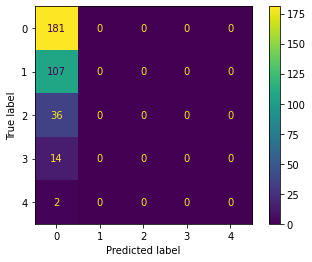

time: 229 ms (started: 2022-11-23 19:04:19 +00:00)


In [24]:
y_pred = clf.predict(x_test)
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
displ.plot()

#xgboost

In [1]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=10, max_depth=6, learning_rate=0.001, objective='multi:softmax')
# fit model
bst.fit(x_train, y_train)


NameError: ignored

              precision    recall  f1-score   support

           0       0.53      0.64      0.58       181
           1       0.31      0.28      0.30       107
           2       0.10      0.06      0.07        36
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         2

    accuracy                           0.43       340
   macro avg       0.19      0.19      0.19       340
weighted avg       0.39      0.43      0.41       340



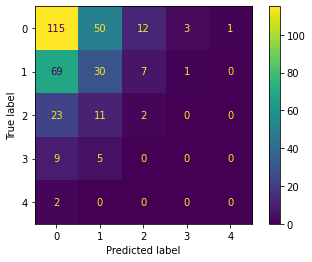

time: 234 ms (started: 2022-11-25 18:24:43 +00:00)


In [42]:
# make predictions
y_pred = bst.predict(x_test)
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
displ.plot()